In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
%pylab inline
#__authors__ = Matt, Kent, and Valeria

Populating the interactive namespace from numpy and matplotlib


# The Experiment 

### Our Idea: Female riders are more likely to be younger than male riders 

### Our Null Hypothesis: Over the span of one month, the average age of female riders will be equal to or higher than the average age of male riders

### $H_0:  F_m >= M_m$

### Our Alternative Hypotheses: Over the span of one month, the average age of female riders will be less than the average age of male riders

### $H_a: F_m < M_m$

### We will use a significance level of $α = 0.05$

In [2]:
!ls /gws/open/Student/citibike

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [3]:
datestring = "201707"
df = pd.read_csv('/gws/open/Student/citibike' + "/" + datestring + '-citibike-tripdata.csv.zip', compression='zip')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [5]:
df['age'] = 2017 - (df['birth year'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,31.0
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1,36.0
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,33.0
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,32.0
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,35.0


In [6]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
      'start station name', 'start station latitude',
      'start station longitude', 'end station id', 'end station name',
      'end station latitude', 'end station longitude', 'bikeid', 'usertype'
       ], axis=1, inplace=True)
df.head()

,birth year,gender,age
0,1986.0,1,31.0
1,1981.0,1,36.0
2,1984.0,2,33.0
3,1985.0,1,32.0
4,1982.0,2,35.0


## Our first attempt at plotting the data

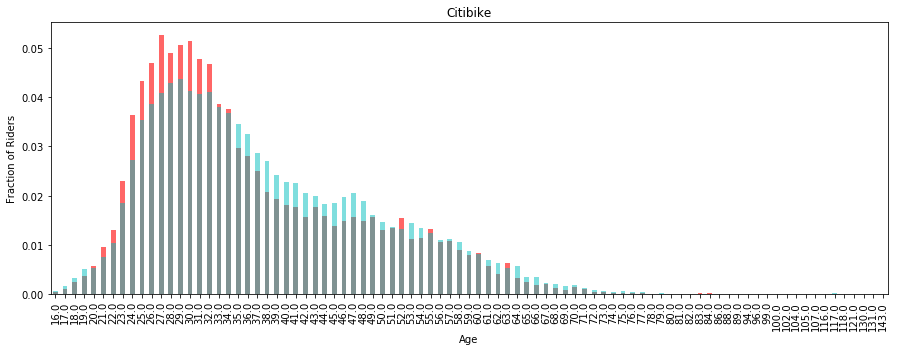

In [7]:
gencount = df['gender'].value_counts() 
femaleAgeCount = (df['age'][df['gender'] == 2].groupby([df['age']]).count())/gencount[2]
maleAgeCount = (df['age'][df['gender'] == 1].groupby([df['age']]).count())/gencount[1]

fig = figsize(15,5)
femaleAgeCount.plot(kind="bar", color = 'r', alpha=.6)
maleAgeCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('Age')
pl.ylabel('Fraction of Riders')
pl.title('Citibike');

## Fig. 1 shows the normalized distribution of age by gender. After plotting this, we determined that it was a pretty visual, but not useful for testing our hypothesis. We set out to analyze the data differently

In [8]:
dfAvg = df.groupby('gender', as_index=False).age.mean()
dfAvg = dfAvg.drop(dfAvg.index[0])
dfAvg

,gender,age
1,1,37.813331
2,2,36.290960


## Our second plot

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


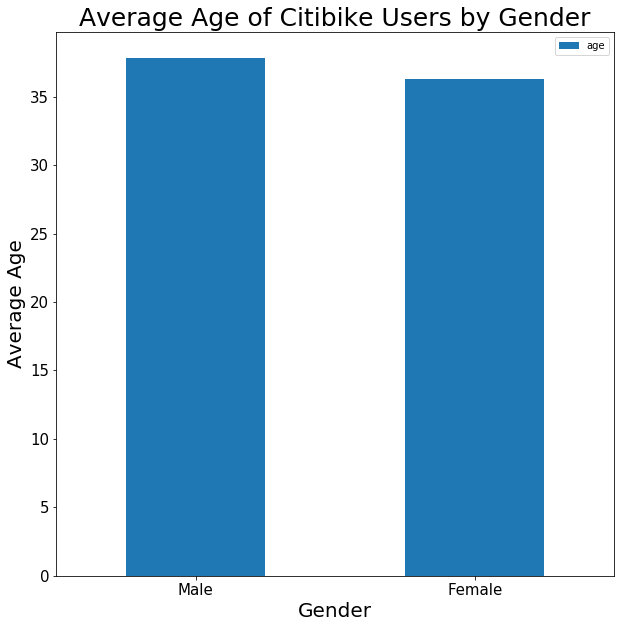

In [9]:
fig = figsize(10,10)
#x = (dfAvg['gender'][1], dfAvg['gender'][2])
#y = (dfAvg['age'][1], dfAvg['age'][2])
dfAvg['gender'][1] = 'Male' 
dfAvg['gender'][2] = 'Female'
dfAvg.plot(x='gender',y='age', kind='bar', fontsize=15, rot=0);
pl.xlabel('Gender', fontsize=20)
pl.ylabel('Average Age', fontsize=20)
pl.title('Average Age of Citibike Users by Gender', fontsize=25);

## Fig. 2 showcases the average age of Citibike users separated by gender. These numbers will be used to determine whether there is a significant difference between the average age of users based on gender.